<a href="https://colab.research.google.com/github/prateekazam/ml/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc

# Literature review

# Data Import and descriptions

## Loading data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df_current  = pd.read_csv('/content/drive/MyDrive/2021-SUMMER-DATA-VIZ/NYPD_Arrest_Data__Year_to_Date_.csv')
df_historic = pd.read_csv('/content/drive/MyDrive/2021-SUMMER-DATA-VIZ/NYPD_Arrests_Data__Historic_.csv')

In [4]:
print(' data shape is ' , df_current.shape  , 'historic ' , df_historic.shape )

 data shape is  (39144, 19) historic  (5153369, 19)


In [5]:
df_current.head(2)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,226147627,03/26/2021,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306501,F,M,5,0,25-44,M,WHITE,984946,200203,40.716196,-73.997491,POINT (-73.99749074599998 40.716195914000025)
1,226113029,03/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,84,0,18-24,M,BLACK,987792,190460,40.689453,-73.987229,POINT (-73.98722940999993 40.689452980000056)


In [6]:
df_historic.head(2)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,32311380,06/18/2007,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN,NaN
1,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)


In [7]:
df_total  = pd.concat([df_current,df_historic])
print(' total data shape is ' , df_total.shape )

 total data shape is  (5192513, 20)


In [8]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5192513 entries, 0 to 5153368
Data columns (total 20 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ARREST_KEY                int64  
 1   ARREST_DATE               object 
 2   PD_CD                     float64
 3   PD_DESC                   object 
 4   KY_CD                     float64
 5   OFNS_DESC                 object 
 6   LAW_CODE                  object 
 7   LAW_CAT_CD                object 
 8   ARREST_BORO               object 
 9   ARREST_PRECINCT           int64  
 10  JURISDICTION_CODE         float64
 11  AGE_GROUP                 object 
 12  PERP_SEX                  object 
 13  PERP_RACE                 object 
 14  X_COORD_CD                float64
 15  Y_COORD_CD                float64
 16  Latitude                  float64
 17  Longitude                 float64
 18  New Georeferenced Column  object 
 19  Lon_Lat                   object 
dtypes: float64(7), int64(2),

In [9]:
df_total.head(2)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Lon_Lat
0,226147627,03/26/2021,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306501,F,M,5,0.0,25-44,M,WHITE,984946.0,200203.0,40.716196,-73.997491,POINT (-73.99749074599998 40.716195914000025),NaN
1,226113029,03/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,84,0.0,18-24,M,BLACK,987792.0,190460.0,40.689453,-73.987229,POINT (-73.98722940999993 40.689452980000056),NaN


In [10]:
df_clean = df_total.drop(columns=['New Georeferenced Column','Lon_Lat'])

In [11]:
df_clean.head(2)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,226147627,03/26/2021,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306501,F,M,5,0.0,25-44,M,WHITE,984946.0,200203.0,40.716196,-73.997491
1,226113029,03/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,84,0.0,18-24,M,BLACK,987792.0,190460.0,40.689453,-73.987229


In [12]:
df_clean.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,5.192513e+06,5.192220e+06,5.183437e+06,5.192513e+06,5.192503e+06,5.192512e+06,5.192512e+06,5.192512e+06,5.192512e+06
mean,9.997502e+07,5.081646e+02,2.995717e+02,6.071974e+01,1.303259e+00,1.005365e+06,2.147311e+05,4.075585e+01,-7.392375e+01
std,5.588156e+07,2.643690e+02,1.810516e+02,3.432564e+01,9.444072e+00,2.005470e+04,1.620989e+05,4.381989e-01,7.237756e-02
min,9.926901e+06,0.000000e+00,1.010000e+02,1.000000e+00,0.000000e+00,9.133570e+05,1.211310e+05,4.049891e+01,-7.425494e+01
25%,6.044490e+07,2.690000e+02,1.260000e+02,3.300000e+01,0.000000e+00,9.933360e+05,1.868570e+05,4.067952e+01,-7.396719e+01
50%,8.479117e+07,5.110000e+02,3.410000e+02,6.000000e+01,0.000000e+00,1.004904e+06,2.093710e+05,4.074131e+01,-7.392544e+01
75%,1.472280e+08,7.480000e+02,3.480000e+02,8.400000e+01,0.000000e+00,1.015900e+06,2.366140e+05,4.081609e+01,-7.388565e+01
max,2.263952e+08,9.970000e+02,9.950000e+02,1.230000e+02,9.700000e+01,1.067302e+06,8.202360e+06,6.208307e+01,-7.368178e+01


## Columns descriptions


1. ARREST_KEY	 Randomly generated persistent ID for each arrest Plain Text
1. ARREST_DATE Exact date of arrest for the reported event
Date & Time
1. PD_CD	Three digit internal classification code (more granular than Key Code) Number
1. PD_DESC Description of internal classification corresponding with PD code (more granular than Offense Description) Plain Text
1. KY_CD Three digit internal classification code (more general category than PD code) Number
1. OFNS_DESC Description of internal classification corresponding with KY code (more general category than PD description) Plain Text
1. LAW_CODE	Law code charges corresponding to the NYS Penal Law, VTL and other various local laws
Plain Text
1. LAW_CAT_CD	
Level of offense: felony, misdemeanor, violation
Plain Text
1. ARREST_BORO	
Borough of arrest. B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)
Plain Text
1. ARREST_PRECINCT	
Precinct where the arrest occurred
Number
1. JURISDICTION_CODE	
Jurisdiction responsible for arrest. Jurisdiction codes 0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst codes 3 and more represent non NYPD jurisdictions
Number
1. AGE_GROUP	
Perpetrator’s age within a category
Plain Text
1. PERP_SEX	
Perpetrator’s sex description
Plain Text
1. PERP_RACE	Perpetrator’s race description Plain Text
1. X_COORD_CD	Midblock X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
Number
1. Y_COORD_CD	
Midblock Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104) Number
1. Latitude	 Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326) Number
1. Longitude	 Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326) Number
1. New Georeferenced Column	 Point


# Data Transformation

## Missing value

### Checking null value in columns

In [13]:
df_clean.isnull().sum()

ARREST_KEY               0
ARREST_DATE              0
PD_CD                  293
PD_DESC               9076
KY_CD                 9076
OFNS_DESC             9076
LAW_CODE               196
LAW_CAT_CD           19217
ARREST_BORO              8
ARREST_PRECINCT          0
JURISDICTION_CODE       10
AGE_GROUP               17
PERP_SEX                 0
PERP_RACE                0
X_COORD_CD               1
Y_COORD_CD               1
Latitude                 1
Longitude                1
dtype: int64

### Total numbers of rows with nan value

In [14]:
df_clean.isnull().sum().sum()

46973

### Dropping rows which ofns desc values are null

In [15]:
df_clean.dropna(subset=["OFNS_DESC"], inplace=True)

### Total number of rows after droipping the coloumns

In [16]:
df_clean.isnull().sum()

ARREST_KEY               0
ARREST_DATE              0
PD_CD                    0
PD_DESC                  0
KY_CD                    0
OFNS_DESC                0
LAW_CODE                 0
LAW_CAT_CD           19021
ARREST_BORO              8
ARREST_PRECINCT          0
JURISDICTION_CODE       10
AGE_GROUP               13
PERP_SEX                 0
PERP_RACE                0
X_COORD_CD               1
Y_COORD_CD               1
Latitude                 1
Longitude                1
dtype: int64

In [17]:
df_clean.isnull().sum().sum()

19056

In [18]:
is_NaN = df_clean.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_clean[row_has_NaN]
rows_with_NaN.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
228,224435564,02/16/2021,49.0,U.S. CODE UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000049,NaN,M,10,0.0,18-24,M,WHITE HISPANIC,982288.0,210220.0,40.743690,-74.007082
360,225736815,03/17/2021,49.0,U.S. CODE UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000049,NaN,Q,109,0.0,25-44,F,WHITE,1035883.0,222713.0,40.777829,-73.813572
546,224495764,02/17/2021,49.0,U.S. CODE UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000049,NaN,Q,110,0.0,25-44,F,WHITE,1020237.0,210724.0,40.745000,-73.870128
574,225640906,03/15/2021,49.0,U.S. CODE UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000049,NaN,K,60,0.0,25-44,M,BLACK,990824.0,149705.0,40.577587,-73.976336
586,224792369,02/24/2021,49.0,U.S. CODE UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000049,NaN,B,42,0.0,25-44,F,BLACK HISPANIC,1012075.0,242857.0,40.833226,-73.899451


## Converting ARREST_DATE Object to date object


atetime64[ns] is a general dtype, while <M8[ns] is a specific dtype. General dtypes map to specific dtypes, but may be different from one installation of NumPy to the next.



In [19]:
df_clean['ARREST_DATE'] = pd.to_datetime(df_clean['ARREST_DATE'])

In [20]:
df_clean['ARREST_DATE'].dtype

dtype('<M8[ns]')

## Correcting MURDER & NON-NEGL. MANSLAUGHTE offense code

MURDER & NON-NEGL. MANSLAUGHTE and MURDER & NON-NEGL. MANSLAUGHTER are the same , replacing MURDER & NON-NEGL. MANSLAUGHTER to MURDER & NON-NEGL. MANSLAUGHTE

In [21]:
df_clean['OFNS_DESC'] = df_clean['OFNS_DESC'].str.replace('MURDER & NON-NEGL. MANSLAUGHTER','MURDER & NON-NEGL. MANSLAUGHTE', case = False)

# Data Exploration & Analysis

## Find Top 10 counts for below categories

1. Offenses
1. Sub categories offenses
1. Race
1. Sex
1. Age Grop

### Offenses

In [22]:
ofns_desc = df_clean.groupby(['OFNS_DESC'])[['OFNS_DESC']].size().reset_index(name='Counts')
ofns_desc = ofns_desc.sort_values(by=['Counts'],ascending=False)
ofns_desc.head(10)
# size counts NaN values, count does not.

,OFNS_DESC,Counts
15,DANGEROUS DRUGS,1092377
7,ASSAULT 3 & RELATED OFFENSES,521911
65,OTHER OFFENSES RELATED TO THEFT,304191
66,OTHER STATE LAWS,241534
71,PETIT LARCENY,224296
23,FELONY ASSAULT,213736
85,VEHICLE AND TRAFFIC LAWS,206450
14,CRIMINAL TRESPASS,201364
16,DANGEROUS WEAPONS,199607
49,MISCELLANEOUS PENAL LAW,188498


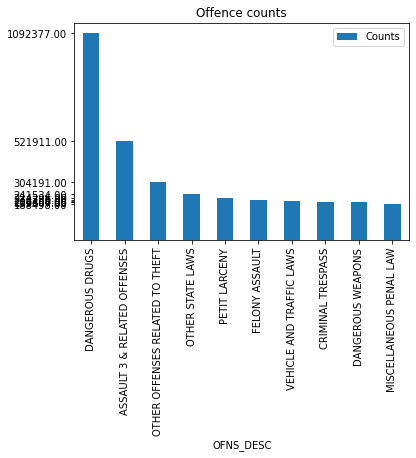

In [23]:
import matplotlib.pyplot as plt
import matplotlib

ofns_desc_10 = ofns_desc.head(10)
y  = ofns_desc_10['Counts']
ax = ofns_desc_10.plot(kind='bar' ,x='OFNS_DESC',y='Counts',rot=0, legend=True)
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))
plt.yticks(y)
plt.xticks(rotation=90)
plt.title('Offence counts')
plt.show()

### Sub type of offenses

Checking PD_DESC Description of internal classification corresponding with PD code (more granular than Offense Description) and their count

In [24]:
pd_desc = df_clean.groupby(['PD_DESC'])[['PD_DESC']].size().reset_index(name='Counts')
pd_desc = pd_desc.sort_values(by=['Counts'],ascending=False)
pd_desc.head(10)

,PD_DESC,Counts
222,"MARIJUANA, POSSESSION 4 & 5",423783
24,ASSAULT 3,422736
375,"THEFT OF SERVICES, UNCLASSIFIED",303359
61,"CONTROLLED SUBSTANCE, POSSESSION 7",278083
256,"NY STATE LAWS,UNCLASSIFIED VIOLATION",225678
196,"LARCENY,PETIT FROM OPEN AREAS,UNCLASSIFIED",188347
23,"ASSAULT 2,1,UNCLASSIFIED",174981
382,"TRAFFIC,UNCLASSIFIED INFRACTION",165647
361,"STOLEN PROPERTY 3,POSSESSION",151873
333,"ROBBERY,UNCLASSIFIED,OPEN AREAS",143263


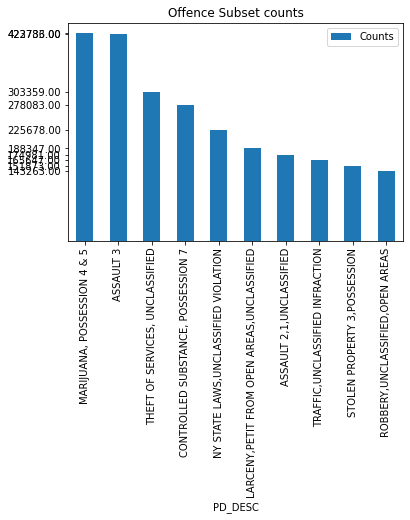

In [25]:
import matplotlib.pyplot as plt
import matplotlib

pd_desc_10 = pd_desc.head(10)
y  = pd_desc_10['Counts']
ax = pd_desc_10.plot(kind='bar' ,x='PD_DESC',y='Counts',rot=0, legend=True)
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))
plt.yticks(y)
plt.xticks(rotation=90)
plt.title('Offence Subset counts')
plt.show()

### Race

In [26]:
race = df_clean.groupby(['PERP_RACE'])[['PERP_RACE']].size().reset_index(name='Counts')
race = race.sort_values(by=['Counts'],ascending=False)
race.head(10)

,PERP_RACE,Counts
2,BLACK,2516876
7,WHITE HISPANIC,1346004
6,WHITE,624207
3,BLACK HISPANIC,417950
1,ASIAN / PACIFIC ISLANDER,214435
5,UNKNOWN,51082
0,AMERICAN INDIAN/ALASKAN NATIVE,11520
4,OTHER,1363


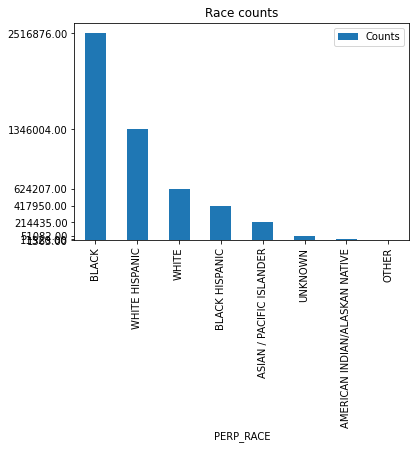

In [27]:
import matplotlib.pyplot as plt
import matplotlib

race_10 = race.head(10)
y  = race_10['Counts']
ax = race_10.plot(kind='bar' ,x='PERP_RACE',y='Counts',rot=0, legend=True)
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))
plt.yticks(y)
plt.xticks(rotation=90)
plt.title('Race counts')
plt.show()

### Sex

In [28]:
sex = df_clean.groupby(['PERP_SEX'])[['PERP_SEX']].size().reset_index(name='Counts')
sex = sex.sort_values(by=['Counts'],ascending=False)
sex.head(10)

,PERP_SEX,Counts
1,M,4312895
0,F,870542


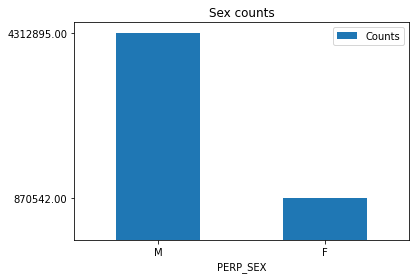

In [29]:
import matplotlib.pyplot as plt
import matplotlib

y  = sex['Counts']
ax = sex.plot(kind='bar' ,x='PERP_SEX',y='Counts',rot=0, legend=True)
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))
plt.yticks(y)
plt.title('Sex counts')
plt.show()

### Age Group

In [30]:
age_group = df_clean.groupby(['AGE_GROUP'])[['AGE_GROUP']].size().reset_index(name='Counts')
age_group = age_group.sort_values(by=['Counts'],ascending=False)
age_group.head(10)

,AGE_GROUP,Counts
22,25-44,2411651
4,18-24,1352464
34,45-64,955860
89,<18,419040
36,65+,44231
45,895,13
77,945,7
67,935,7
44,894,7
69,937,5


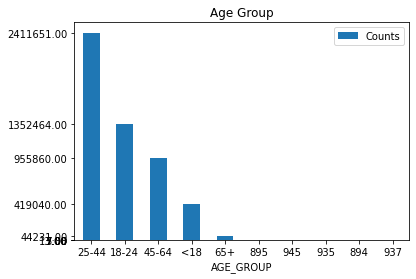

In [31]:
import matplotlib.pyplot as plt
import matplotlib

age_group_10 = age_group.head(10)
y  = age_group_10['Counts']
ax = age_group_10.plot(kind='bar' ,x='AGE_GROUP',y='Counts',rot=0, legend=True)
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))
plt.yticks(y)
plt.title('Age Group')
plt.show()

## Relationship information

### Murder counts per year

In [32]:
df_clean['ARREST_DATE'].dtypes

dtype('<M8[ns]')

In [33]:
murder_ofns_desc = df_clean.groupby([df_clean.ARREST_DATE.dt.year,'OFNS_DESC'])[['OFNS_DESC']].size().reset_index(name='Counts')
murder_ofns_desc = murder_ofns_desc.sort_values(by=['ARREST_DATE'],ascending=False)
murder_ofns_desc = murder_ofns_desc[murder_ofns_desc['OFNS_DESC'].str.contains("MURDER")]
murder_ofns_desc

,ARREST_DATE,OFNS_DESC,Counts
1002,2021,MURDER & NON-NEGL. MANSLAUGHTE,279
944,2020,MURDER & NON-NEGL. MANSLAUGHTE,1190
880,2019,MURDER & NON-NEGL. MANSLAUGHTE,1013
815,2018,MURDER & NON-NEGL. MANSLAUGHTE,875
747,2017,MURDER & NON-NEGL. MANSLAUGHTE,948
680,2016,MURDER & NON-NEGL. MANSLAUGHTE,957
615,2015,MURDER & NON-NEGL. MANSLAUGHTE,858
547,2014,MURDER & NON-NEGL. MANSLAUGHTE,1062
480,2013,MURDER & NON-NEGL. MANSLAUGHTE,748
414,2012,MURDER & NON-NEGL. MANSLAUGHTE,962


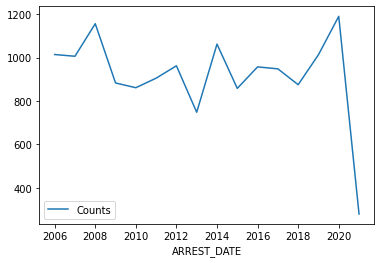

In [34]:
murder_ofns_desc.plot(x='ARREST_DATE', y='Counts', kind='line')
plt.show()

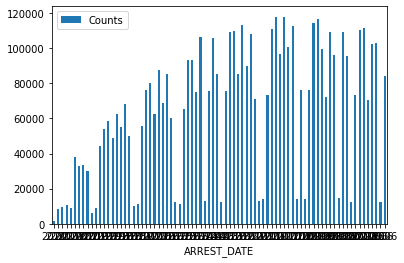

In [35]:
# ax = murder_ofns_desc.plot.bar(rot=0)
boro_desc = df_clean.groupby([df_clean.ARREST_DATE.dt.year,'ARREST_BORO'])[['ARREST_BORO']].size().reset_index(name='Counts')
boro_desc = boro_desc.sort_values(by=['ARREST_DATE'],ascending=False)
# murder_ofns_desc = murder_ofns_desc[murder_ofns_desc['OFNS_DESC'].str.contains("MURDER")]
boro_desc
ax = boro_desc.plot.bar(x= 'ARREST_DATE',rot=0)


## Extra

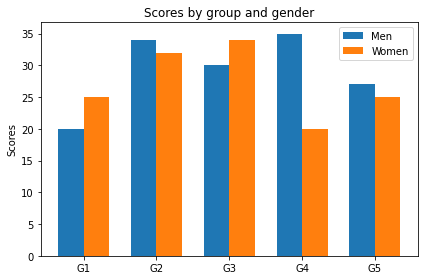

In [36]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [37]:
# murder_ofns_desc1['OFNS_DESC'].str.replace('MURDER & NON-NEGL. MANSLAUGHTE','MURDER & NON-NEGL. MANSLAUGHTER')
# murder_ofns_desc1['OFNS_DESC'] = 
# df_clean['OFNS_DESC'].str.replace('MURDER & NON-NEGL. MANSLAUGHTER','MURDER & NON-NEGL. MANSLAUGHTE', case = False)
# murder_ofns_desc2 = murder_ofns_desc2.groupby(['OFNS_DESC'])[['OFNS_DESC']].size().reset_index(name='Counts')
# murder_ofns_desc2
# murder_ofns_desc2[murder_ofns_desc2['OFNS_DESC'].str.contains("MURDER")]
# murder_ofns_desc1[murder_ofns_desc1['OFNS_DESC'] == "MURDER & NON-NEGL. MANSLAUGHTE"]
# murder_ofns_desc1
# df_clean.head(2)
# df_clean[df_clean['OFNS_DESC'].str.contains("MURDER")].head(2)

In [38]:
# df_clean['PD_CD'!= 49.0]
df_clean.loc[df_clean['PD_CD'] != 49.0]

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,226147627,2021-03-26,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306501,F,M,5,0.0,25-44,M,WHITE,984946.0,200203.0,40.716196,-73.997491
1,226113029,2021-03-25,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,84,0.0,18-24,M,BLACK,987792.0,190460.0,40.689453,-73.987229
2,225789182,2021-03-18,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,48,0.0,18-24,M,BLACK,1011811.0,246833.0,40.844140,-73.900389
3,225751057,2021-03-17,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,79,0.0,25-44,M,WHITE,1000272.0,187022.0,40.680003,-73.942236
4,225591004,2021-03-14,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,49,0.0,25-44,M,BLACK,1021639.0,250223.0,40.853408,-73.864849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5153364,207601040,2020-01-08,273.0,"TAMPERING 1,CRIMINAL",121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1452000,F,M,1,1.0,25-44,M,BLACK HISPANIC,980772.0,194845.0,40.701489,-74.012545
5153365,206891807,2020-01-01,113.0,"MENACING,UNCLASSIFIED",344.0,ASSAULT 3 & RELATED OFFENSES,PL 1201401,M,K,90,0.0,<18,M,BLACK,993514.0,197321.0,40.708281,-73.966587
5153366,207760542,2020-01-11,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,13,0.0,25-44,M,WHITE,986464.0,208227.0,40.738220,-73.992012
5153367,206896678,2020-01-01,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,111,0.0,45-64,M,BLACK,1053534.0,211808.0,40.747777,-73.749952


In [39]:
df_clean.groupby(['PD_DESC']).count()

,ARREST_KEY,ARREST_DATE,PD_CD,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
PD_DESC,,,,,,,,,,,,,,,,,
"A.B.C.,FALSE PROOF OF AGE",407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407
ABANDON ANIMAL,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
ABORTION 1,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
"ABORTION 2, 1, SELF",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ABSCONDING FROM WORK RELEASE 2,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WEAPONS,MFR,TRANSPORT,ETC.",262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262
"WEAPONS,PROHIBITED USE",36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
"WEAPONS,PROHIBITED USE IMITATI",2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [40]:
ofns_desc_key_cd = df_clean.groupby(['OFNS_DESC','KY_CD'])[['OFNS_DESC']].count()
# pd.set_option('display.max_rows', df1.shape[0]+1)
ofns_desc_key_cd

OFNS_DESC
OFNS_DESC                              KY_CD           
ABORTION                               123.0         10
ADMINISTRATIVE CODE                    365.0        465
                                       675.0      13813
ADMINISTRATIVE CODES                   685.0        169
AGRICULTURE & MRKTS LAW-UNCLASSIFIED   364.0        138
...                                                 ...
UNAUTHORIZED USE OF A VEHICLE 3 (UUV)  353.0      11248
UNDER THE INFLUENCE, DRUGS             577.0         11
UNLAWFUL POSS. WEAP. ON SCHOOL         455.0          1
UNLAWFUL POSS. WEAP. ON SCHOOL GROUNDS 455.0         63
VEHICLE AND TRAFFIC LAWS               348.0     206450

[102 rows x 1 columns]

In [41]:
df2= df_clean.groupby(['PD_DESC','PD_CD','OFNS_DESC','KY_CD'])[['OFNS_DESC']].count()
df2

OFNS_DESC
PD_DESC                                 PD_CD OFNS_DESC                              KY_CD           
A.B.C.,FALSE PROOF OF AGE               803.0 OTHER STATE LAWS                       677.0        407
ABANDON ANIMAL                          818.0 AGRICULTURE & MRKTS LAW-UNCLASSIFIED   364.0          3
ABORTION 1                              143.0 ABORTION                               123.0         10
ABORTION 2, 1, SELF                     146.0 OFFENSES AGAINST THE PERSON            355.0          1
ABSCONDING FROM WORK RELEASE 2          756.0 OFFENSES AGAINST PUBLIC ADMINISTRATION 359.0         27
...                                                                                               ...
WEAPONS,PROHIBITED USE                  786.0 DANGEROUS WEAPONS                      236.0         26
                                        796.0 DANGEROUS WEAPONS                      118.0         10
WEAPONS,PROHIBITED USE IMITATI          787.0 DANGEROUS WEAPONS                      236.0          2
WEAPONS,PROHIBITED USE IMITATION PISTOL 787.0 DANGEROUS WEAPONS                      236.0          5
WOUNDS,REPORTING OF                     797.0 OFFENSES AGAINST PUBLIC SAFETY         363.0          1

[472 rows x 1 columns]

In [42]:
ofns_desc_key_cd

OFNS_DESC
OFNS_DESC                              KY_CD           
ABORTION                               123.0         10
ADMINISTRATIVE CODE                    365.0        465
                                       675.0      13813
ADMINISTRATIVE CODES                   685.0        169
AGRICULTURE & MRKTS LAW-UNCLASSIFIED   364.0        138
...                                                 ...
UNAUTHORIZED USE OF A VEHICLE 3 (UUV)  353.0      11248
UNDER THE INFLUENCE, DRUGS             577.0         11
UNLAWFUL POSS. WEAP. ON SCHOOL         455.0          1
UNLAWFUL POSS. WEAP. ON SCHOOL GROUNDS 455.0         63
VEHICLE AND TRAFFIC LAWS               348.0     206450

[102 rows x 1 columns]

In [43]:
df_clean.loc[df_clean['OFNS_DESC'] == 'ABORTION']

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
245700,188019656,2018-09-25,143.0,ABORTION 1,123.0,ABORTION,PL 1254000,F,K,68,0.0,25-44,M,WHITE,980244.0,170356.0,40.634272,-74.014435
312373,184587703,2018-06-29,143.0,ABORTION 1,123.0,ABORTION,PL 1254000,F,K,79,2.0,25-44,M,BLACK,1000629.0,193391.0,40.697483,-73.940934
400808,182478206,2018-05-08,143.0,ABORTION 1,123.0,ABORTION,PL 1254000,F,B,41,0.0,25-44,M,WHITE HISPANIC,1013880.0,240034.0,40.825472,-73.892941
753289,171560375,2017-11-14,143.0,ABORTION 1,123.0,ABORTION,PL 1254000,F,Q,114,0.0,25-44,M,BLACK,1007694.0,219657.0,40.769561,-73.915363
1352095,148645245,2015-12-17,143.0,ABORTION 1,123.0,ABORTION,PL 1254000,F,B,40,0.0,25-44,M,WHITE HISPANIC,1005041.0,234533.0,40.810398,-73.924895
1449323,145598871,2015-08-24,143.0,ABORTION 1,123.0,ABORTION,PL 1254500,F,Q,101,0.0,18-24,M,BLACK,1052370.0,158776.0,40.602226,-73.754689
1499269,144109756,2015-06-30,143.0,ABORTION 1,123.0,ABORTION,PL 1254000,F,Q,106,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1028605.0,187930.0,40.682398,-73.840079
1720565,139318145,2014-10-23,143.0,ABORTION 1,123.0,ABORTION,PL 1254000,F,M,26,0.0,18-24,M,BLACK,996343.0,236150.0,40.814853,-73.956313
2077803,93540700,2013-11-12,143.0,ABORTION 1,123.0,ABORTION,PL 1254500,F,M,24,0.0,25-44,M,BLACK,993373.0,229301.0,40.796058,-73.967052
4893333,26140517,2007-01-07,143.0,ABORTION 1,123.0,ABORTION,PL 1254000,F,Q,104,0.0,25-44,M,WHITE HISPANIC,1009891.0,194977.0,40.701815,-73.907526


In [44]:
df_clean.loc[df_clean['KY_CD'] == 675].shape

(13813, 18)

In [45]:
102234+806

103040

In [46]:
df_clean.loc[(df_clean['PD_DESC'] == 'ABORTION 2, 1, SELF') | (df_clean['OFNS_DESC'] == 'OFFENSES AGAINST THE PERSON') ]

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
467,225007183,2021-03-01,115.0,RECKLESS ENDANGERMENT 2,355.0,OFFENSES AGAINST THE PERSON,PL 1202000,M,K,71,0.0,25-44,M,BLACK,995869.0,178188.0,40.655762,-73.958126
499,225705682,2021-03-16,115.0,RECKLESS ENDANGERMENT 2,355.0,OFFENSES AGAINST THE PERSON,PL 1202000,M,K,73,0.0,25-44,M,BLACK,1006546.0,184351.0,40.672658,-73.919625
677,225168297,2021-03-05,115.0,RECKLESS ENDANGERMENT 2,355.0,OFFENSES AGAINST THE PERSON,PL 1202000,M,Q,100,0.0,65+,M,BLACK,1030346.0,150502.0,40.579658,-73.834058
759,224862401,2021-02-25,115.0,RECKLESS ENDANGERMENT 2,355.0,OFFENSES AGAINST THE PERSON,PL 1202000,M,M,14,0.0,25-44,M,BLACK,990886.0,213048.0,40.751450,-73.976051
1059,225359770,2021-03-09,115.0,RECKLESS ENDANGERMENT 2,355.0,OFFENSES AGAINST THE PERSON,PL 1202000,M,B,45,0.0,18-24,M,BLACK HISPANIC,1039281.0,254741.0,40.865717,-73.801040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152719,209522076,2020-02-13,115.0,RECKLESS ENDANGERMENT 2,355.0,OFFENSES AGAINST THE PERSON,PL 1202000,M,Q,108,0.0,25-44,M,WHITE HISPANIC,1009681.0,207938.0,40.737390,-73.908234
5152820,207561950,2020-01-07,115.0,RECKLESS ENDANGERMENT 2,355.0,OFFENSES AGAINST THE PERSON,PL 1202000,M,S,123,0.0,25-44,F,WHITE,918937.0,122382.0,40.502353,-74.234854
5153103,206907028,2020-01-02,115.0,RECKLESS ENDANGERMENT 2,355.0,OFFENSES AGAINST THE PERSON,PL 1202000,M,B,48,0.0,25-44,M,BLACK HISPANIC,1014131.0,247458.0,40.845848,-73.892001
5153240,207781314,2020-01-12,181.0,"IMPRISONMENT 2,UNLAWFUL",355.0,OFFENSES AGAINST THE PERSON,PL 1350500,M,B,47,0.0,25-44,M,WHITE HISPANIC,1021797.0,263197.0,40.889017,-73.864205
